In [1]:
import pandas as pd
import sys
import numpy as np
import geopandas as gp
import matplotlib.pyplot as plt

# Precinct Shapefile

## VEST's Documentation File

Election results from Delaware Department of Elections (https://elections.delaware.gov/archive/elect18/elect18_general/html/index.shtml)
Precinct shapefile from State of Delaware FirstMap GIS (http://opendata.firstmap.delaware.gov/datasets/delaware-election-boundaries)

Precincts 17-02, 16-31, and 16-41 are the reporting units for UOCAVA votes from New Castle, Kent, and Sussex Counties, respectively. These were distributed by candidate to precincts based on their share of the precinct-level reported vote.

Precincts 02-09/10-09, 05-09/11-09, 08-09/12-09/13-09 were split in the shapefile to reflect changes made prior to the 2018 election.

- G18USSDCAR - Thomas R. Carper (Democratic Party)
- G18USSRARL - Robert B. Arlett (Republican Party)
- G18USSGTHE - Emitri G. Theodoropoulos (Green Party)
- G18USSLFRO - Nadine M. Frost (Libertarian Party)


- G18HALDROC - Lisa Blunt Rochester (Democratic Party)
- G18HALRWAL - Scott Walker (Republican Party)


- G18ATGDJEN - Kathleen Jennings (Democratic Party)
- G18ATGRPEP - Bernard V. Pepukayi, Sr. (Republican Party)


- G18TREDDAV - Colleen Davis (Democratic Party)
- G18TRERSIM - Kenneth A. Simpler (Republican Party)
- G18TREGCHA - David B. Chandler (Green Party)


- G18AUDDMCG - Kathleen K. McGuiness (Democratic Party)
- G18AUDRSPA - James Spadola (Republican Party)


## Load VEST's Final File

In [2]:
vest_shp = gp.read_file("./raw-from-source/VEST/de_2018/de_2018.shp")

In [3]:
vest_shp.shape

(434, 15)

In [4]:
vest_shp.head(1)

,PRECINCT,G18USSDCAR,G18USSRARL,G18USSGTHE,G18USSLFRO,G18HALDROC,G18HALRWAL,G18ATGDJEN,G18ATGRPEP,G18TREDDAV,G18TRERSIM,G18TREGCHA,G18AUDDMCG,G18AUDRSPA,geometry
0,01-21,353,170,2,3,349,165,337,178,271,246,5,290,229,"POLYGON ((-8424454.124 4829097.736, -8424475.4..."


<AxesSubplot:>

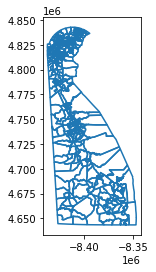

In [5]:
vest_shp.boundary.plot()

# Election Results

## Load 5 Files

The SOS directed us to this link for election results for the 2018 general: https://elections.delaware.gov/archive/elect18/elect18_general/html/stwres.shtml

We copy-pasted each election section to separate csv files and load them individually below. 

In [6]:
uss_results = pd.read_csv('./raw-from-source/SOS/DE Election Results - uss_g18.csv', 
                         names = ['Office','District','Total',
                                  'G18USSDCAR_mc','G18USSDCAR_abs','G18USSDCAR',
                                  'G18USSRARL_mc','G18USSRARL_abs','G18USSRARL',
                                  'G18USSGTHE_mc','G18USSGTHE_abs','G18USSGTHE',
                                  'G18USSLFRO_mc','G18USSLFRO_abs','G18USSLFRO'])
uss_results = uss_results[(uss_results.Office == 'UNITED STATES SENATOR') & (uss_results.District.str.contains('-'))]
uss_results.head()

,Office,District,Total,G18USSDCAR_mc,G18USSDCAR_abs,G18USSDCAR,G18USSRARL_mc,G18USSRARL_abs,G18USSRARL,G18USSGTHE_mc,G18USSGTHE_abs,G18USSGTHE,G18USSLFRO_mc,G18USSLFRO_abs,G18USSLFRO
3,UNITED STATES SENATOR,01-01,643,552,29,581,50,1,51,5,0,5,4,2,6
4,UNITED STATES SENATOR,02-01,"1,000",903,34,937,36,0,36,22,0,22,5,0,5
5,UNITED STATES SENATOR,03-01,573,520,21,541,19,1,20,8,0,8,4,0,4
6,UNITED STATES SENATOR,04-01,818,748,19,767,30,1,31,12,0,12,8,0,8
7,UNITED STATES SENATOR,05-01,"1,008",830,30,860,106,5,111,23,0,23,13,1,14


In [7]:
hal_results = pd.read_csv('./raw-from-source/SOS/DE Election Results - hal_g18.csv',
                         names = ['Office','District','Total',
                                  'G18HALDROC_mc','G18HALDROC_abs','G18HALDROC',
                                  'G18HALRWAL_mc','G18HALRWAL_abs','G18HALRWAL'])
hal_results = hal_results[(hal_results.Office == 'REPRESENTATIVE IN CONGRESS') & (hal_results.District.str.contains('-'))]
hal_results.head()

,Office,District,Total,G18HALDROC_mc,G18HALDROC_abs,G18HALDROC,G18HALRWAL_mc,G18HALRWAL_abs,G18HALRWAL
3,REPRESENTATIVE IN CONGRESS,01-01,636,564,30,594,41,1,42
4,REPRESENTATIVE IN CONGRESS,02-01,"1,007",945,34,979,28,0,28
5,REPRESENTATIVE IN CONGRESS,03-01,573,533,23,556,15,2,17
6,REPRESENTATIVE IN CONGRESS,04-01,811,766,18,784,26,1,27
7,REPRESENTATIVE IN CONGRESS,05-01,997,868,29,897,95,5,100


In [8]:
tre_results = pd.read_csv('./raw-from-source/SOS/DE Election Results - tre_g18.csv',
                         names = ['Office','District','Total',
                                  'G18TREDDAV_mc','G18TREDDAV_abs','G18TREDDAV',
                                  'G18TRERSIM_mc','G18TRERSIM_abs','G18TRERSIM',
                                  'G18TREGCHA_mc','G18TREGCHA_abs','G18TREGCHA'])
tre_results = tre_results[(tre_results.Office == 'STATE TREASURER') & (tre_results.District.str.contains('-'))]
tre_results.head()

,Office,District,Total,G18TREDDAV_mc,G18TREDDAV_abs,G18TREDDAV,G18TRERSIM_mc,G18TRERSIM_abs,G18TRERSIM,G18TREGCHA_mc,G18TREGCHA_abs,G18TREGCHA
3,STATE TREASURER,01-01,626,491,26,517,96,4,100,9,0,9
4,STATE TREASURER,02-01,978,879,30,909,49,2,51,18,0,18
5,STATE TREASURER,03-01,569,514,23,537,16,2,18,14,0,14
6,STATE TREASURER,04-01,784,693,17,710,55,2,57,17,0,17
7,STATE TREASURER,05-01,982,717,23,740,201,11,212,29,1,30


In [9]:
aud_results = pd.read_csv('./raw-from-source/SOS/DE Election Results - aud_g18.csv',
                         names = ['Office','District','Total',
                                  'G18AUDDMCG_mc','G18AUDDMCG_abs','G18AUDDMCG',
                                  'G18AUDRSPA_mc','G18AUDRSPA_abs','G18AUDRSPA'])
aud_results = aud_results[(aud_results.Office == 'AUDITOR OF ACCOUNTS') & (aud_results.District.str.contains('-'))]
aud_results.head()

,Office,District,Total,G18AUDDMCG_mc,G18AUDDMCG_abs,G18AUDDMCG,G18AUDRSPA_mc,G18AUDRSPA_abs,G18AUDRSPA
3,AUDITOR OF ACCOUNTS,01-01,626,502,24,526,95,5,100
4,AUDITOR OF ACCOUNTS,02-01,969,887,31,918,49,2,51
5,AUDITOR OF ACCOUNTS,03-01,552,509,22,531,19,2,21
6,AUDITOR OF ACCOUNTS,04-01,796,721,19,740,55,1,56
7,AUDITOR OF ACCOUNTS,05-01,987,701,24,725,248,14,262


In [10]:
atg_results = pd.read_csv('./raw-from-source/SOS/DE Election Results - atg_g18.csv',
                         names = ['Office','District','Total',
                                  'G18ATGDJEN_mc','G18ATGDJEN_abs','G18ATGDJEN',
                                  'G18ATGRPEP_mc','G18ATGRPEP_abs','G18ATGRPEP'])
atg_results = atg_results[(atg_results.Office == 'ATTORNEY GENERAL') & (atg_results.District.str.contains('-'))]
atg_results.head()

,Office,District,Total,G18ATGDJEN_mc,G18ATGDJEN_abs,G18ATGDJEN,G18ATGRPEP_mc,G18ATGRPEP_abs,G18ATGRPEP
3,ATTORNEY GENERAL,01-01,640,486,29,515,121,4,125
4,ATTORNEY GENERAL,02-01,996,811,25,836,152,8,160
5,ATTORNEY GENERAL,03-01,561,458,20,478,81,2,83
6,ATTORNEY GENERAL,04-01,803,684,19,703,99,1,100
7,ATTORNEY GENERAL,05-01,989,786,27,813,166,10,176


## Merge 5 Files

In [11]:
election_results = uss_results.merge(hal_results, how = 'outer', on = 'District').merge(tre_results, 
                                                  how = 'outer', on = 'District').merge(aud_results, 
                                                  how = 'outer', on = 'District').merge(atg_results, 
                                                  how = 'outer', on = 'District')

In [12]:
cols = {x: 'float' for x in election_results.columns if 'G18' in x}
election_results = election_results.replace(',','', regex=True)
election_results = election_results.astype(cols)

# Validating Election Results

## Race Totals

In [13]:
vest_shp.columns

Index(['PRECINCT', 'G18USSDCAR', 'G18USSRARL', 'G18USSGTHE', 'G18USSLFRO',
       'G18HALDROC', 'G18HALRWAL', 'G18ATGDJEN', 'G18ATGRPEP', 'G18TREDDAV',
       'G18TRERSIM', 'G18TREGCHA', 'G18AUDDMCG', 'G18AUDRSPA', 'geometry'],
      dtype='object')

In [14]:
data_columns = ['G18USSDCAR', 'G18USSRARL', 'G18USSGTHE', 'G18USSLFRO',
       'G18HALDROC', 'G18HALRWAL', 'G18ATGDJEN', 'G18ATGRPEP', 'G18TREDDAV',
       'G18TRERSIM', 'G18TREGCHA', 'G18AUDDMCG', 'G18AUDRSPA']

print("Printing differences below")
for race in data_columns:
    if (sum(vest_shp[race])- election_results[race].sum() != 0):
        print(race+" has a difference of "+str(sum(vest_shp[race])-election_results[race].sum())+" votes")
        print("\tVEST: "+str(sum(vest_shp[race]))+" votes")
        print("\tSOURCES: "+str(election_results[race].sum())+" votes")
    else:
        print(race + " is equal", "\tVEST: " + str(sum(vest_shp[race])), "\tRDH: " + str(election_results[race].sum()))
print("")
print("All other races are equal")

Printing differences below
G18USSDCAR is equal 	VEST: 217385 	RDH: 217385.0
G18USSRARL is equal 	VEST: 137127 	RDH: 137127.0
G18USSGTHE is equal 	VEST: 4170 	RDH: 4170.0
G18USSLFRO is equal 	VEST: 3910 	RDH: 3910.0
G18HALDROC is equal 	VEST: 227353 	RDH: 227353.0
G18HALRWAL is equal 	VEST: 125384 	RDH: 125384.0
G18ATGDJEN is equal 	VEST: 218351 	RDH: 218351.0
G18ATGRPEP is equal 	VEST: 137730 	RDH: 137730.0
G18TREDDAV is equal 	VEST: 187240 	RDH: 187240.0
G18TRERSIM is equal 	VEST: 164001 	RDH: 164001.0
G18TREGCHA is equal 	VEST: 6301 	RDH: 6301.0
G18AUDDMCG is equal 	VEST: 205624 	RDH: 205624.0
G18AUDRSPA is equal 	VEST: 149481 	RDH: 149481.0

All other races are equal


## County-by-County Totals

In [15]:
vest_shp.shape

(434, 15)

In [16]:
election_results.shape

(436, 50)

In [17]:
election_results.sort_values('District').head()

,Office_x,District,Total_x,G18USSDCAR_mc,G18USSDCAR_abs,G18USSDCAR,G18USSRARL_mc,G18USSRARL_abs,G18USSRARL,G18USSGTHE_mc,...,G18AUDRSPA_abs,G18AUDRSPA,Office,Total,G18ATGDJEN_mc,G18ATGDJEN_abs,G18ATGDJEN,G18ATGRPEP_mc,G18ATGRPEP_abs,G18ATGRPEP
0,UNITED STATES SENATOR,01-01,643,552.0,29.0,581.0,50.0,1.0,51.0,5.0,...,5.0,100.0,ATTORNEY GENERAL,640,486.0,29.0,515.0,121.0,4.0,125.0
14,UNITED STATES SENATOR,01-02,741,679.0,15.0,694.0,26.0,2.0,28.0,13.0,...,1.0,36.0,ATTORNEY GENERAL,736,579.0,16.0,595.0,139.0,2.0,141.0
27,UNITED STATES SENATOR,01-03,481,425.0,5.0,430.0,26.0,0.0,26.0,10.0,...,0.0,46.0,ATTORNEY GENERAL,477,405.0,4.0,409.0,66.0,2.0,68.0
37,UNITED STATES SENATOR,01-04,1219,843.0,85.0,928.0,242.0,19.0,261.0,17.0,...,35.0,499.0,ATTORNEY GENERAL,1216,869.0,83.0,952.0,239.0,25.0,264.0
53,UNITED STATES SENATOR,01-05,1037,812.0,18.0,830.0,186.0,1.0,187.0,9.0,...,0.0,219.0,ATTORNEY GENERAL,1031,775.0,17.0,792.0,237.0,2.0,239.0


Note: New Castle is not fips code 001. The first two digits of `RD-ED` do not correspond to fips. 

In [18]:
vest_shp.sort_values('PRECINCT').head()

,PRECINCT,G18USSDCAR,G18USSRARL,G18USSGTHE,G18USSLFRO,G18HALDROC,G18HALRWAL,G18ATGDJEN,G18ATGRPEP,G18TREDDAV,G18TRERSIM,G18TREGCHA,G18AUDDMCG,G18AUDRSPA,geometry
5,01-01,582,51,5,6,595,42,515,125,517,100,9,526,100,"POLYGON ((-8407935.202 4831832.283, -8407957.0..."
6,01-02,695,28,13,6,722,25,595,141,672,34,17,679,36,"POLYGON ((-8410302.300 4827543.064, -8410298.6..."
7,01-03,430,26,10,15,451,32,409,68,425,28,15,425,46,"POLYGON ((-8411336.792 4828825.843, -8411346.1..."
8,01-04,929,261,18,12,971,223,952,264,684,500,25,703,499,"POLYGON ((-8413287.555 4832059.508, -8413275.1..."
9,01-05,831,187,9,11,849,174,792,239,777,229,22,802,219,"POLYGON ((-8420436.604 4810966.168, -8420438.1..."


We will only validate the statewide totals and not continue to validate the county totals at this time, because the SOS file and the VEST file do not break out election results by county. There are only 3 counties in Delaware. 

## Precinct-by-Precinct Votes

### Distribute UOCAVA Votes

Created the following shapefile by intersecting the 2010 Census county shapefile with the Precincts shapefile linked by VEST in GQIS, to get the precinct to county translation. 

In [19]:
precinct_county = gp.read_file('./raw-from-source/Census/de_precincts_county_intersection/de_precincts_county_intersection.shp')

In [20]:
precinct_county_original = precinct_county.copy()

In [21]:
precinct_county[['EDRD_2012','COUNTY','COUNTYFP']]

,EDRD_2012,COUNTY,COUNTYFP
0,01-21,New Castle County,003
1,01-22,New Castle County,003
2,01-23,New Castle County,003
3,01-24,New Castle County,003
4,01-25,New Castle County,003
...,...,...,...
425,08-38,Sussex County,005
426,08-40,Sussex County,005
427,08-41,Sussex County,005
428,09-20,Sussex County,005


In [22]:
election_results.shape

(436, 50)

In [23]:
election_results_county = election_results.merge(precinct_county, left_on = 'District', right_on = 'EDRD_2012', how = 'outer', indicator = True)
election_results_county.groupby('_merge').count()

,Office_x,District,Total_x,G18USSDCAR_mc,G18USSDCAR_abs,G18USSDCAR,G18USSRARL_mc,G18USSRARL_abs,G18USSRARL,G18USSGTHE_mc,...,POPULATION,DISTRICT,GEOID,NAME,STATE,COUNTY,TOTPOP10,STATEFP,COUNTYFP,geometry
_merge,,,,,,,,,,,,,,,,,,,,,
left_only,7,7,7,7,7,7,7,7,7,7,...,0,0,0,0,0,0,0,0,0,0
right_only,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
both,429,429,429,429,429,429,429,429,429,429,...,429,429,429,429,429,429,429,429,429,429


In [24]:
election_results_county[election_results_county['_merge'] != 'both'][['District','EDRD_2012']]

,District,EDRD_2012
26,17-02,NaN
104,10-09,NaN
105,11-09,NaN
106,12-09,NaN
107,13-09,NaN
345,16-31,NaN
435,16-41,NaN
436,NaN,13-02


These precincts are not in the online shapefile linked by VEST, but they appear in the election results file. 

In [25]:
# print(election_results_county.loc[election_results_county["COUNTY"].isna()])
election_results_county.loc[election_results_county["District"] == '17-02',"COUNTY"]="New Castle County"
election_results_county.loc[election_results_county["District"] == '16-31',"COUNTY"]="Kent County"
election_results_county.loc[election_results_county["District"] == '16-41',"COUNTY"]="Sussex County"

As the below two plots show, all of these precincts are in New Castle County

/Users/peterhorton/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:641: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


<AxesSubplot:>

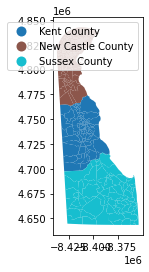

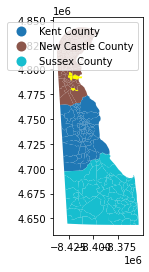

In [26]:
precinct_county_original.plot(column="COUNTY",legend=True)

ax = precinct_county_original.plot(column="COUNTY",legend=True)
vest_shp[vest_shp['PRECINCT'].isin(['10-09','11-09','12-09','13-09'])].plot(column='PRECINCT',legend=True,ax=ax,color="yellow")


In [27]:
election_results_county.loc[election_results_county["District"] == '10-09',"COUNTY"]="New Castle County"
election_results_county.loc[election_results_county["District"] == '11-09',"COUNTY"]="New Castle County"
election_results_county.loc[election_results_county["District"] == '12-09',"COUNTY"]="New Castle County"
election_results_county.loc[election_results_county["District"] == '13-09',"COUNTY"]="New Castle County"

In [28]:
#Expecting this to print an empty dataframe
print(election_results_county.loc[election_results_county["COUNTY"].isna()])

Empty DataFrame
Columns: [Office_x, District, Total_x, G18USSDCAR_mc, G18USSDCAR_abs, G18USSDCAR, G18USSRARL_mc, G18USSRARL_abs, G18USSRARL, G18USSGTHE_mc, G18USSGTHE_abs, G18USSGTHE, G18USSLFRO_mc, G18USSLFRO_abs, G18USSLFRO, Office_y, Total_y, G18HALDROC_mc, G18HALDROC_abs, G18HALDROC, G18HALRWAL_mc, G18HALRWAL_abs, G18HALRWAL, Office_x, Total_x, G18TREDDAV_mc, G18TREDDAV_abs, G18TREDDAV, G18TRERSIM_mc, G18TRERSIM_abs, G18TRERSIM, G18TREGCHA_mc, G18TREGCHA_abs, G18TREGCHA, Office_y, Total_y, G18AUDDMCG_mc, G18AUDDMCG_abs, G18AUDDMCG, G18AUDRSPA_mc, G18AUDRSPA_abs, G18AUDRSPA, Office, Total, G18ATGDJEN_mc, G18ATGDJEN_abs, G18ATGDJEN, G18ATGRPEP_mc, G18ATGRPEP_abs, G18ATGRPEP, OBJECTID, ID, EGIS_OWNER, EDRD_2012, POPULATION, DISTRICT, GEOID, NAME, STATE, COUNTY, TOTPOP10, STATEFP, COUNTYFP, geometry, _merge]
Index: []

[0 rows x 65 columns]


In [29]:
def allocate_absentee(df_receiving_votes,df_allocating,column_list,col_allocating):    
    original_cols = list(df_receiving_votes.columns)
    
    #Add in the "Total Votes column"
    df_receiving_votes.loc[:,"Total_Votes"]=0
    for race in column_list:
        df_receiving_votes.loc[:,"Total_Votes"]+=df_receiving_votes.loc[:,race]
    
    #Create the needed dataframes
    precinct_specific_totals = pd.DataFrame(df_receiving_votes.groupby([col_allocating]).sum())
    precinct_specific_totals.reset_index(drop=False,inplace=True)
    to_dole_out_totals = pd.DataFrame(df_allocating.groupby([col_allocating]).sum())
    to_dole_out_totals.reset_index(drop=False,inplace=True)
    
    #Print out any instances where the allocation, as written, won't work
    special_allocation_needed = []
    for index, row in precinct_specific_totals.iterrows():
        for race in column_list:
            if (row[race]==0):
                race_district = row[col_allocating]
                if race_district in to_dole_out_totals[col_allocating].unique():
                    to_allocate = int(to_dole_out_totals.loc[to_dole_out_totals[col_allocating]==race_district][race])
                    if (to_allocate != 0):
                        special_allocation_needed.append([race_district,race])
    
    #Create some new columns for each of these races to deal with the allocation
    for race in column_list:
        add_var = race+"_add"
        rem_var = race+"_rem"
        floor_var = race+"_floor"
        df_receiving_votes.loc[:,add_var]=0.0
        df_receiving_votes.loc[:,rem_var]=0.0
        df_receiving_votes.loc[:,floor_var]=0.0

    #Iterate over the rows
    #Note this function iterates over the dataframe two times so the rounded vote totals match the totals to allocate
    for index, row in df_receiving_votes.iterrows():
        if row[col_allocating] in to_dole_out_totals[col_allocating].unique():
            for race in column_list:
                add_var = race+"_add"
                rem_var = race+"_rem"
                floor_var = race+"_floor"
                #Grab the district
                county_id = row[col_allocating]
                if [county_id,race] in special_allocation_needed:
                    print([county_id,race])
                    print("Inside this")
                    #Get the denominator for the allocation - the summed "total votes" for precincts in that grouping
                    denom = precinct_specific_totals.loc[precinct_specific_totals[col_allocating]==county_id]["Total_Votes"]
                    #Get one of the numerators, how many districtwide votes to allocate
                    numer = to_dole_out_totals.loc[to_dole_out_totals[col_allocating]==county_id][race]
                    #Get the "total votes" for this particular precinct
                    val = df_receiving_votes.at[index,"Total_Votes"]
                    #Get the vote share, the precincts % of total precinct votes in the district times votes to allocate
                else:
                    #Get the denominator for the allocation (the precinct vote totals)
                    denom = precinct_specific_totals.loc[precinct_specific_totals[col_allocating]==county_id][race]
                    #Get one of the numerators, how many districtwide votes to allocate
                    numer = to_dole_out_totals.loc[to_dole_out_totals[col_allocating]==county_id][race]
                    #Get the vote totals for this race in this precinct
                    val = df_receiving_votes.at[index,race]
                    #Get the vote share, the precincts % of total precinct votes in the district times votes to allocate
                if ((float(denom)==0)):
                    vote_share = 0
                else:
                    vote_share = (float(val)/float(denom))*float(numer)
                df_receiving_votes.at[index,add_var] = vote_share
                #Take the decimal remainder of the allocation
                df_receiving_votes.at[index,rem_var] = vote_share%1
                #Take the floor of the allocation
                df_receiving_votes.at[index,floor_var] = np.floor(vote_share)

    #After the first pass through, get the sums of the races by district to assist in the rounding            
    first_allocation = pd.DataFrame(df_receiving_votes.groupby([col_allocating]).sum())

    #Now we want to iterate district by district to work on rounding
    county_list = list(to_dole_out_totals[col_allocating].unique()) 

    #Iterate over the district
    for county in county_list:
        for race in column_list:
            add_var = race+"_add"
            rem_var = race+"_rem"
            floor_var = race+"_floor"
            #County how many votes still need to be allocated (because we took the floor of all the initial allocations)
            to_go = int(np.round((int(to_dole_out_totals.loc[to_dole_out_totals[col_allocating]==county][race])-first_allocation.loc[first_allocation.index==county,floor_var])))
            #Grab the n precincts with the highest remainders and round these up, where n is the # of votes that still need to be allocated
            for index in df_receiving_votes.loc[df_receiving_votes[col_allocating]==county][rem_var].nlargest(to_go).index:
                df_receiving_votes.at[index,add_var] = np.ceil(df_receiving_votes.at[index,add_var])

    #Iterate over every race again
    for race in column_list:
        add_var = race+"_add"
        #Round every allocation down to not add fractional votes
        df_receiving_votes.loc[:,add_var]=np.floor(df_receiving_votes.loc[:,add_var])
        df_receiving_votes.loc[:,race]+=df_receiving_votes.loc[:,add_var]
        
    df_receiving_votes = df_receiving_votes[original_cols]
    
    return df_receiving_votes


In [30]:
df_receiving_votes = election_results_county[~election_results_county['District'].isin(['17-02','16-31','16-41'])]
df_allocating = election_results_county[election_results_county['District'].isin(['17-02','16-31','16-41'])]
column_list = ['G18USSDCAR', 'G18USSRARL', 'G18USSGTHE', 'G18USSLFRO',
       'G18HALDROC', 'G18HALRWAL', 'G18ATGDJEN', 'G18ATGRPEP', 'G18TREDDAV',
       'G18TRERSIM', 'G18TREGCHA', 'G18AUDDMCG', 'G18AUDRSPA']
col_allocating = 'COUNTY'

df_allocated = allocate_absentee(df_receiving_votes,df_allocating,column_list,col_allocating)

/Users/peterhorton/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/Users/peterhorton/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/Users/peterhorton/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying

### Check that totals are the same after allocation

In [31]:
def statewide_totals_check(partner_df,source_df,column_list):
    print("***Statewide Totals Check***")
    for race in column_list:
        if (sum(partner_df[race])- source_df[race].sum() != 0):
            print(race+" has a difference of "+str(sum(partner_df[race])-source_df[race].sum())+" votes")
            print("\tVEST: "+str(sum(partner_df[race]))+" votes")
            print("\tSOURCES: "+str(source_df[race].sum())+" votes")
        else:
            print(race + " is equal", "\tVEST / RDH: " + str(sum(partner_df[race])))

In [32]:
statewide_totals_check(vest_shp,df_allocated,column_list)

***Statewide Totals Check***
G18USSDCAR is equal 	VEST / RDH: 217385
G18USSRARL is equal 	VEST / RDH: 137127
G18USSGTHE is equal 	VEST / RDH: 4170
G18USSLFRO is equal 	VEST / RDH: 3910
G18HALDROC is equal 	VEST / RDH: 227353
G18HALRWAL is equal 	VEST / RDH: 125384
G18ATGDJEN is equal 	VEST / RDH: 218351
G18ATGRPEP is equal 	VEST / RDH: 137730
G18TREDDAV is equal 	VEST / RDH: 187240
G18TRERSIM is equal 	VEST / RDH: 164001
G18TREGCHA is equal 	VEST / RDH: 6301
G18AUDDMCG is equal 	VEST / RDH: 205624
G18AUDRSPA is equal 	VEST / RDH: 149481


### Join VEST and RDH

In [33]:
merge_df = vest_shp.merge(df_allocated, left_on = 'PRECINCT', right_on = 'District', how = 'outer', indicator = "final_merge")

In [34]:
merge_df.groupby('final_merge').count()

,PRECINCT,G18USSDCAR_x,G18USSRARL_x,G18USSGTHE_x,G18USSLFRO_x,G18HALDROC_x,G18HALRWAL_x,G18ATGDJEN_x,G18ATGRPEP_x,G18TREDDAV_x,...,DISTRICT,GEOID,NAME,STATE,COUNTY,TOTPOP10,STATEFP,COUNTYFP,geometry_y,_merge
final_merge,,,,,,,,,,,,,,,,,,,,,
left_only,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
right_only,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
both,433,433,433,433,433,433,433,433,433,433,...,429,429,429,429,433,429,429,429,429,433


In [35]:
merge_df[merge_df['final_merge'] != 'both']

,PRECINCT,G18USSDCAR_x,G18USSRARL_x,G18USSGTHE_x,G18USSLFRO_x,G18HALDROC_x,G18HALRWAL_x,G18ATGDJEN_x,G18ATGRPEP_x,G18TREDDAV_x,...,GEOID,NAME,STATE,COUNTY,TOTPOP10,STATEFP,COUNTYFP,geometry_y,_merge,final_merge
433,13-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,left_only
434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10003,"New Castle County, Delaware",Delaware,New Castle County,538479.0,10,003,"POLYGON ((-8411754.463 4827552.762, -8411752.4...",right_only,right_only


### Validate

In [36]:
def precinct_votes_check(merged_df,column_list,vest_on_left,name_col,print_level=0):
    merged_df = merged_df.sort_values(by=[name_col],inplace=False)
    matching_rows = 0
    different_rows = 0
    diff_list=[]
    diff_values = []
    max_diff = 0
    for index,row in merged_df.iterrows():
        same = True
        for i in column_list:
            left_data = i + "_x"
            right_data = i + "_y"
            if ((row[left_data] is None) or (row[right_data] is None) or (np.isnan(row[right_data])or(np.isnan(row[left_data])))):
                print("FIX NaN value at: ", row[name_col])
                return;
            diff = abs(row[left_data]-row[right_data])
            if (diff>0):
                same = False
                diff_values.append(abs(diff))
                if (diff>max_diff):
                    max_diff = diff
            if(diff>print_level):
                if (vest_on_left):
                    print(i, "{:.>72}".format(row[name_col]), "(V)","{:.>5}".format(int(row[left_data]))," (S){:.>5}".format(int(row[right_data])),"(D):{:>5}".format(int(row[left_data]-row[right_data])))                           
                else:
                    print(i, "{:.>72}".format(row[name_col]), "(S)","{:.>5}".format(int(row[left_data]))," (V){:.>5}".format(int(row[right_data])),"(D):{:>5}".format(int(row[left_data]-row[right_data])))
        if(same != True):
            different_rows +=1
            diff_list.append(row[name_col])
        else:
            matching_rows +=1
    print("")
    print("There are ", len(merged_df.index)," total rows")
    print(different_rows," of these rows have election result differences")
    print(matching_rows," of these rows are the same")
    print("")
    print("The max difference between any one shared column in a row is: ", max_diff)
    if(len(diff_values)!=0):
        print("The average difference is: ", str(sum(diff_values)/len(diff_values)))
    count_big_diff = len([i for i in diff_values if i > 10])
    print("There are ", str(count_big_diff), "precinct results with a difference greater than 10")
    print("")
    print("All precincts containing differences:")
    diff_list.sort()
    print(diff_list)

In [37]:
precinct_votes_check(merge_df[merge_df['final_merge'] == 'both'],column_list,True,"PRECINCT")


There are  433  total rows
0  of these rows have election result differences
433  of these rows are the same

The max difference between any one shared column in a row is:  0
There are  0 precinct results with a difference greater than 10

All precincts containing differences:
[]
